In [ ]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import *
  from math import pi,sqrt
  import random
  import time
  import numpy as np
  import warnings
  from qiskit.visualization import plot_histogram,plot_state_city,array_to_latex
  from qiskit_textbook.tools import random_state
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc qiskit-aer
  ! pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  from qiskit import *
  from math import pi,sqrt
  import random
  import time
  import numpy as np
  import warnings
  from qiskit.visualization import plot_histogram,plot_state_city,array_to_latex
  from qiskit_textbook.tools import random_state

Dependencies are already installed. Skipping...
Installing Corresponing Dependencies
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
import qiskit
qiskit.__version__

'0.45.0'

In [ ]:
!rm -r modules

In [ ]:
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [ ]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *
from modules.quantum_hardware_circuits import increment_circuit,decrement_circuit

In [ ]:
backend = Aer.get_backend('statevector_simulator')

In [ ]:
def make_circuit_from_vector_state(n,state):
  qr = QuantumRegister(n)
  cr = ClassicalRegister(n)
  qc = QuantumCircuit(qr,cr)
  initialized_state = state
  qc.initialize(initialized_state,qr)
  return qc

In [ ]:
def quantum_walk(n,state_vector):
  qc = make_circuit_from_vector_state(n,state_vector)
  qc.h(0) # coin operator (it can be any unitary matrix of choice)
  c_increment = increment_circuit(n-1).to_gate(label="++").control() # controlled increment gate
  c_decrement = decrement_circuit(n-1).to_gate(label="--").control() # controlled decrement gate
  qc.append(c_increment,[i for i in range(0,n)])
  qc.x(0)
  qc.append(c_decrement,[i for i in range(0,n)])
  return qc


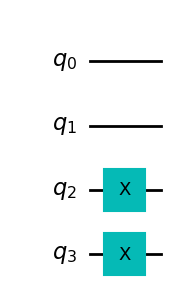

In [ ]:
# create a tempora circuit in which to initialize the quantum state
n = 4
temp_c =  QuantumCircuit(n)
initialize_quantum_circuit(temp_c,[2,3]) # 0011
temp_c.draw("mpl")

In [ ]:
# extract the state from the quantum circuit
initial_state_vector = execute(temp_c,backend).result().get_statevector()

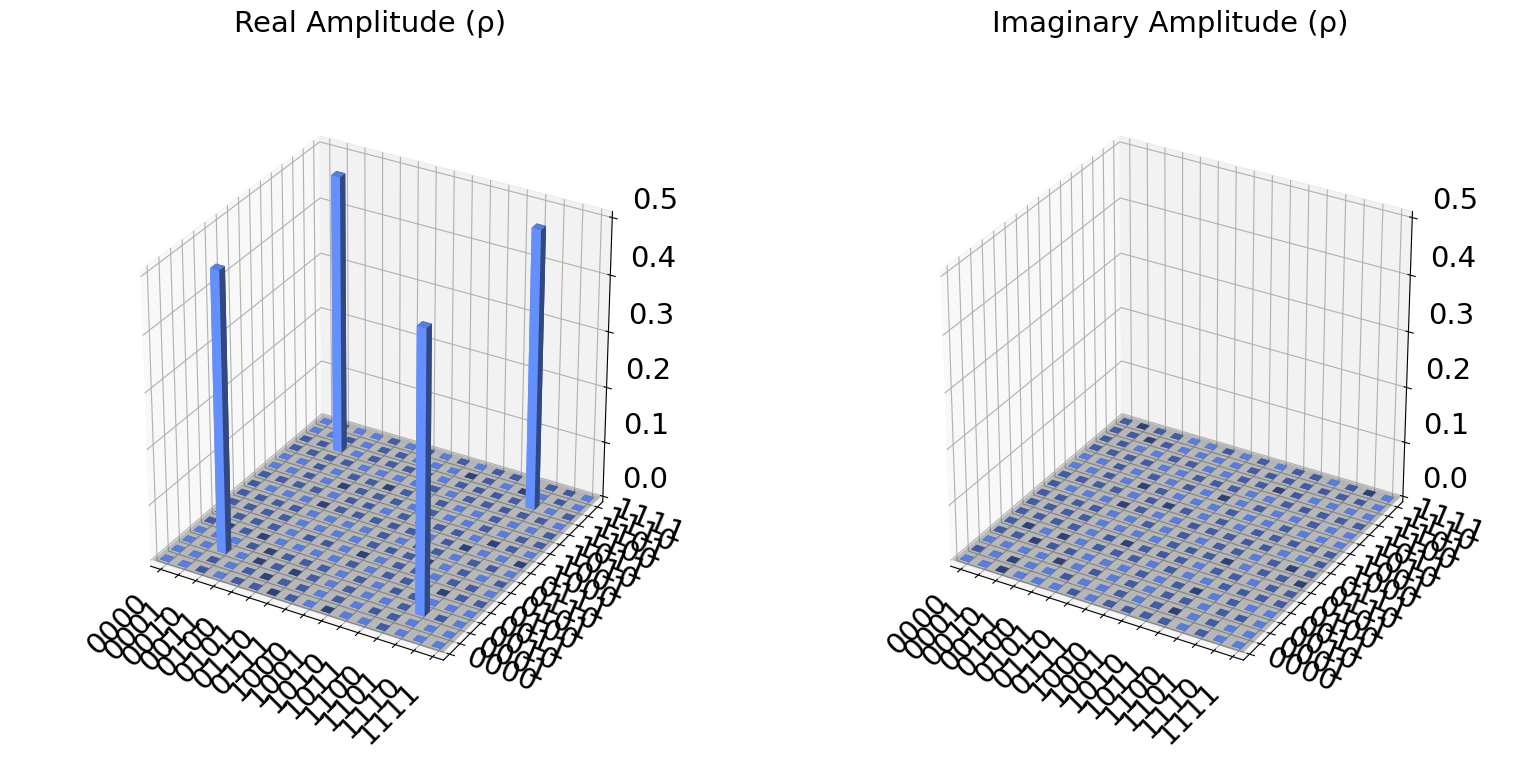

In [ ]:
qc = quantum_walk(n,initial_state_vector)
plot_state_city(execute(qc,backend).result().get_statevector())

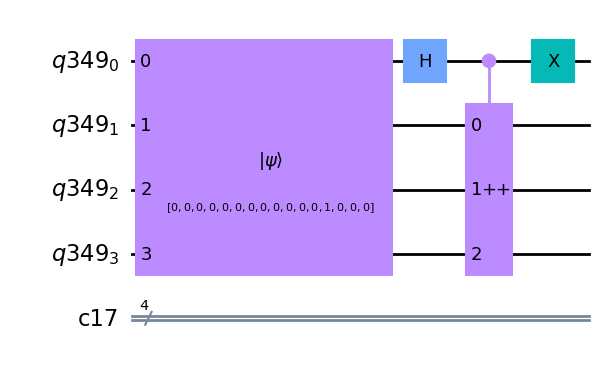

In [ ]:
qc.draw("mpl",fold=-1)

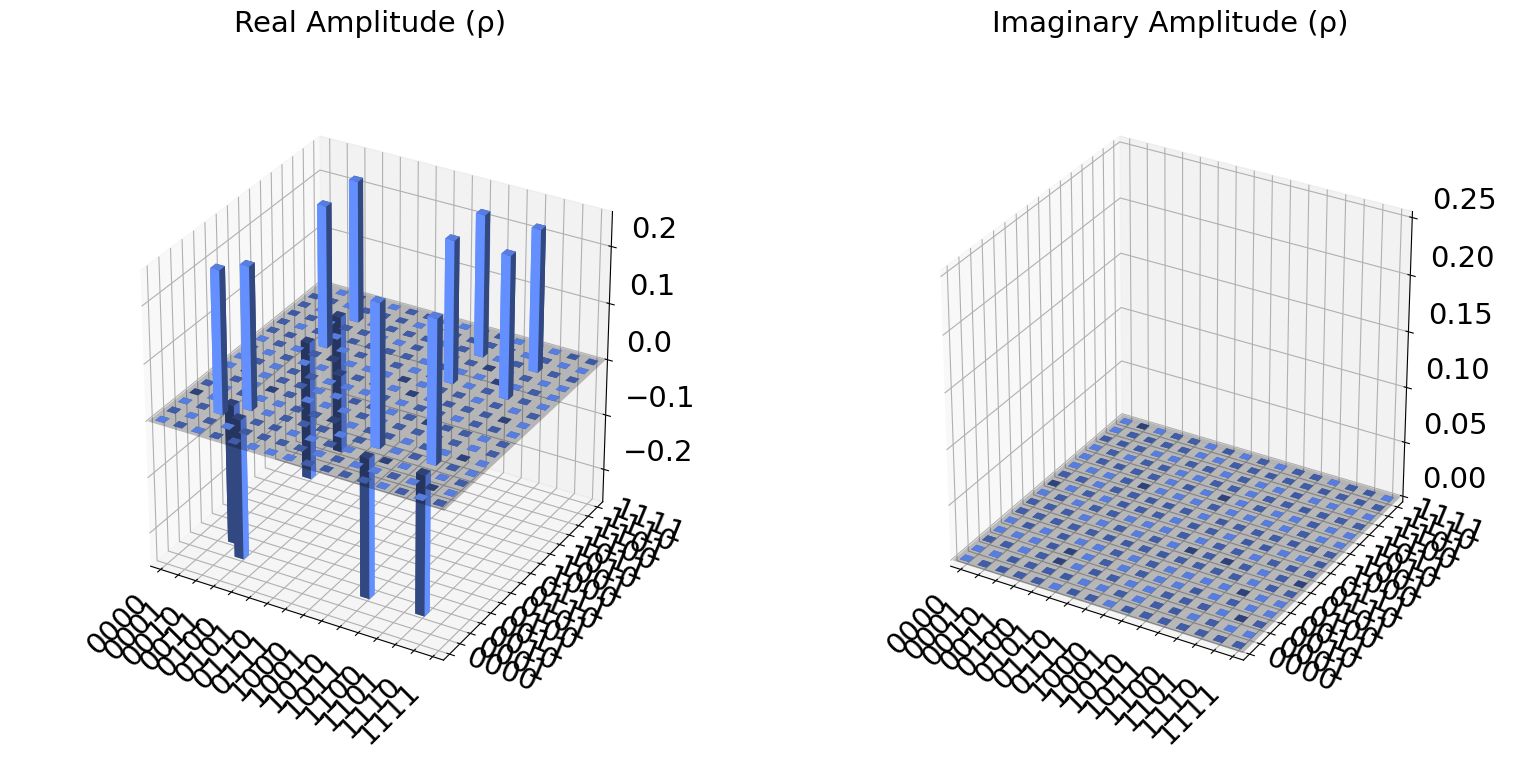

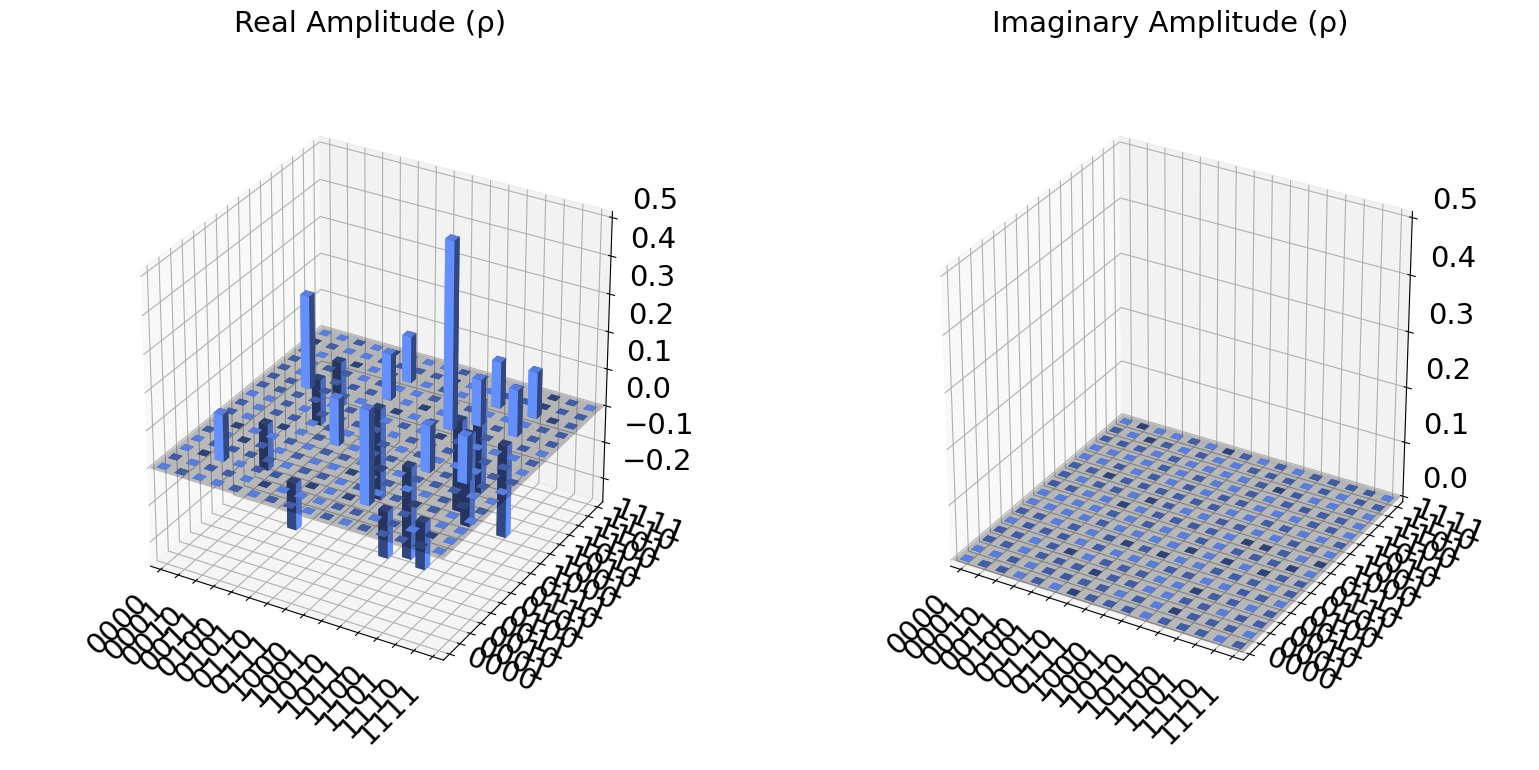

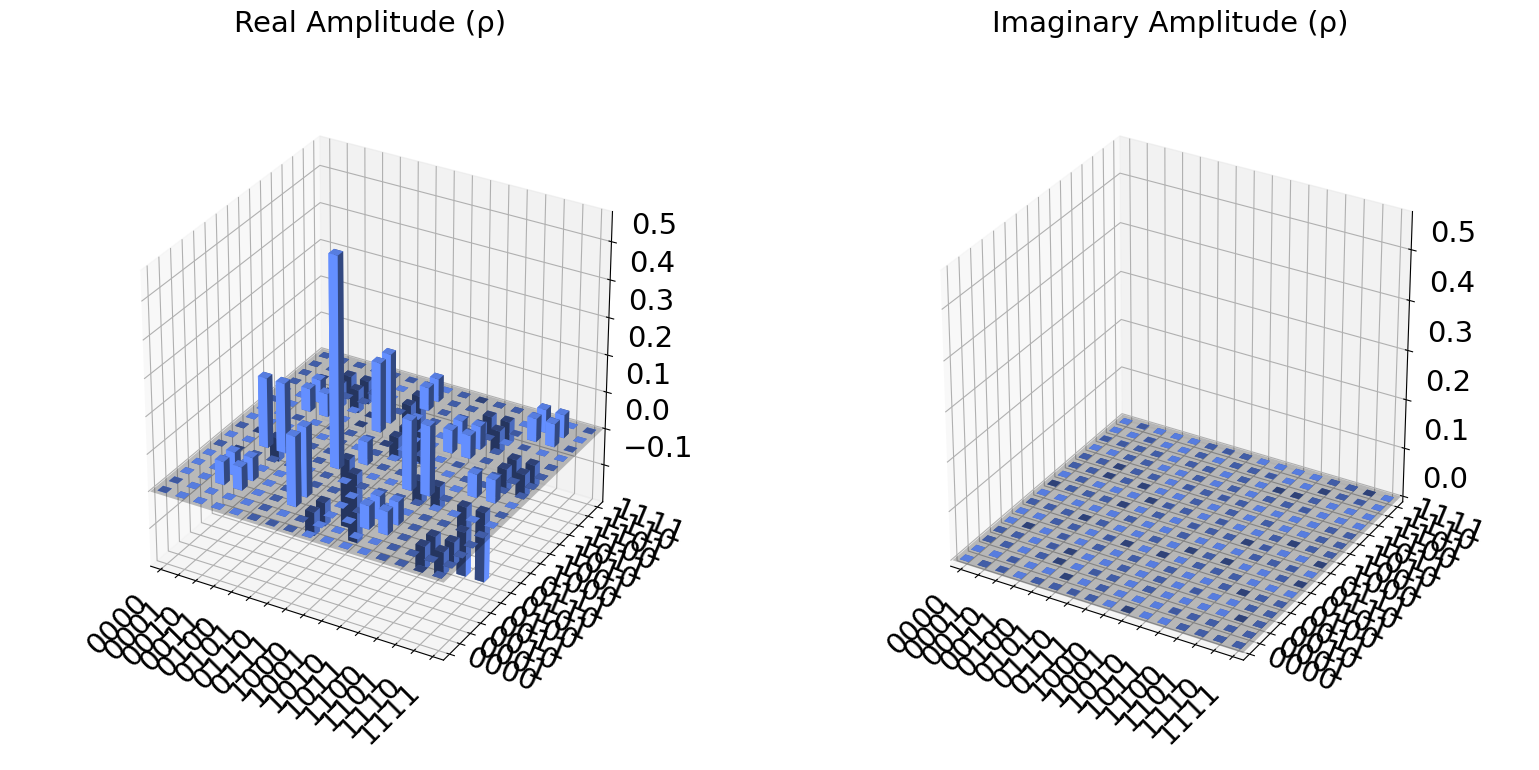

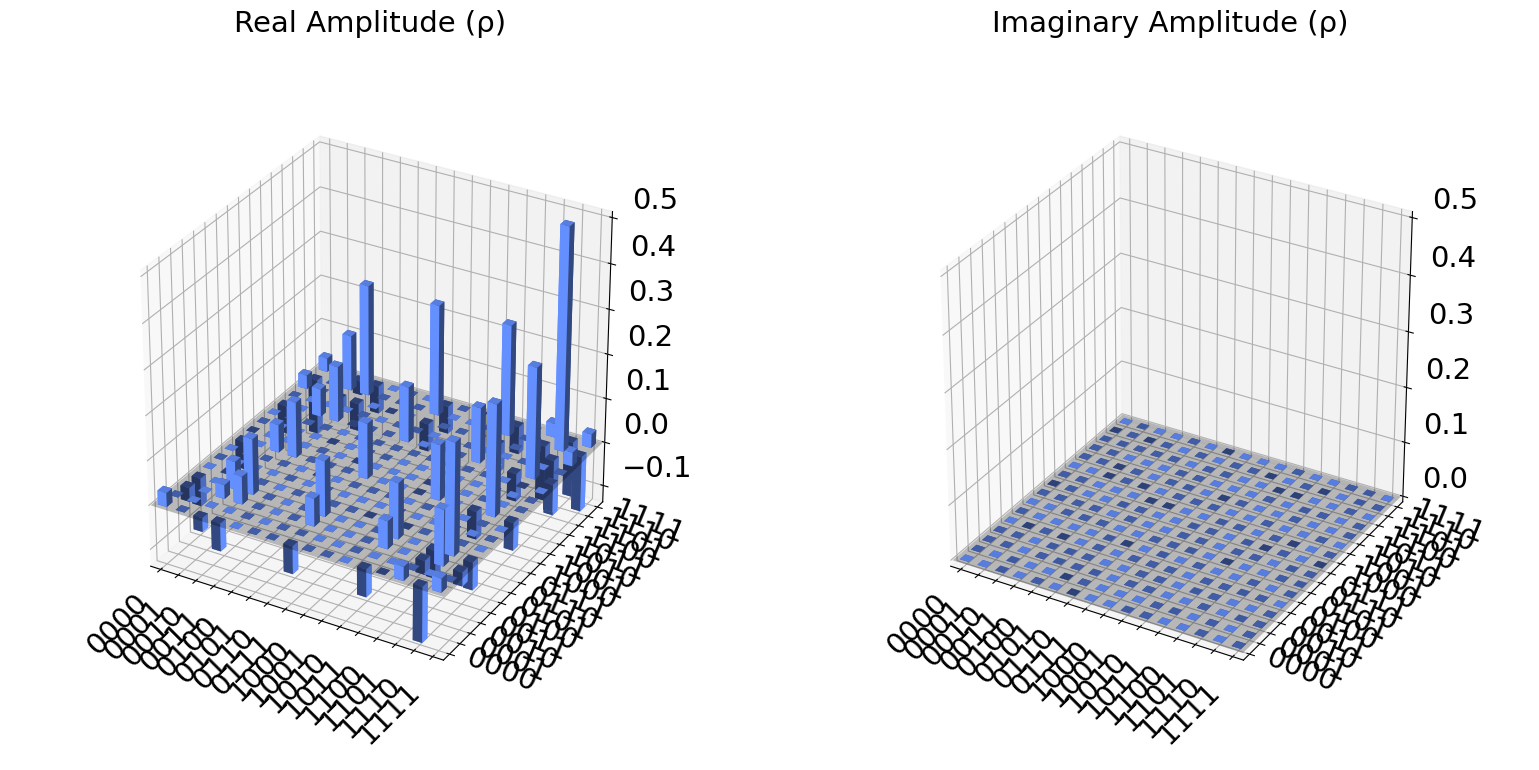

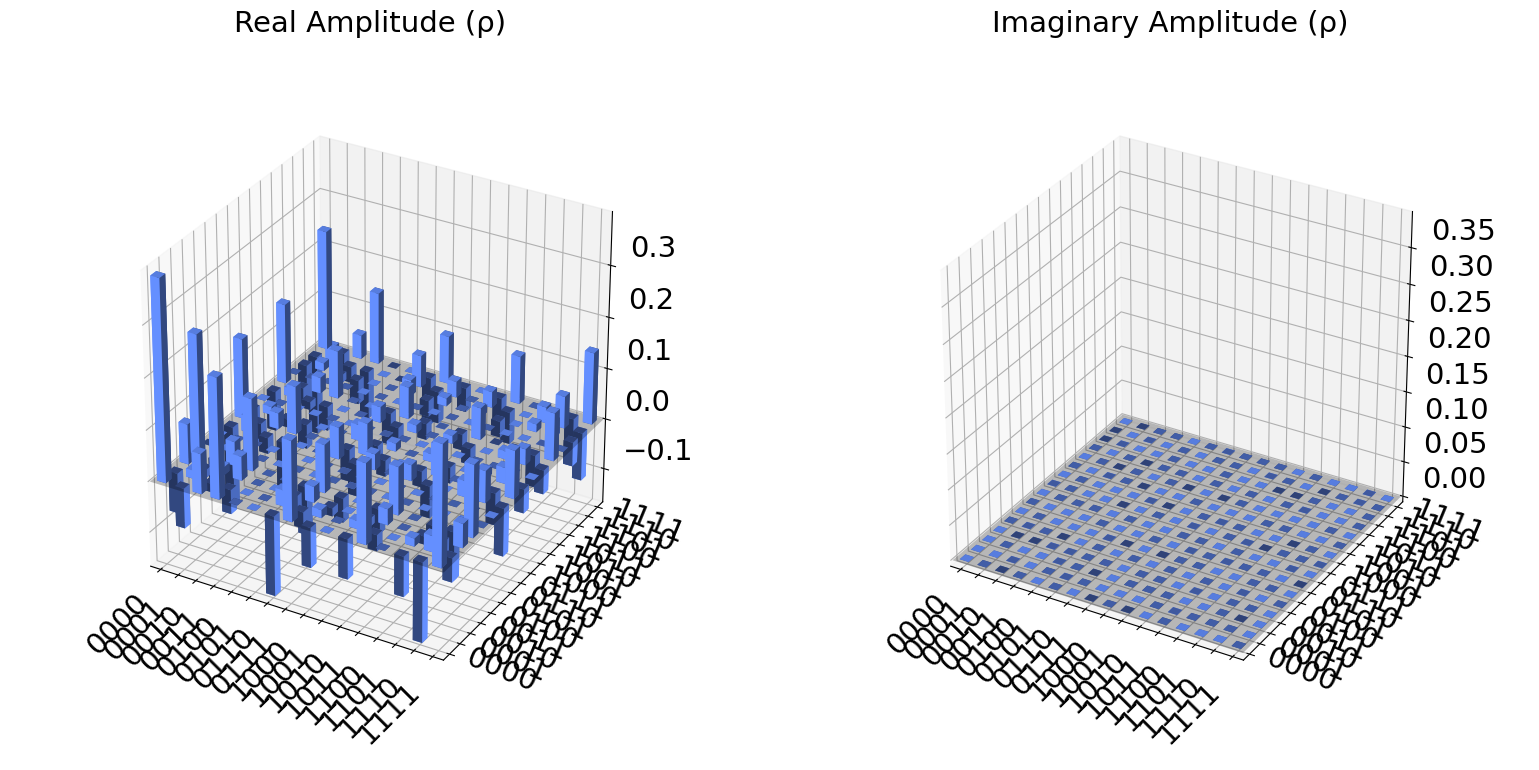

In [ ]:
for i in range(5):
  qc = quantum_walk(n,execute(qc,backend).result().get_statevector())
  display(plot_state_city(execute(qc,backend).result().get_statevector()))